Размер выборки: 10000
Первые 10 значений: [ 0.67853708 -0.50432807  0.04174829 -0.20753509  0.12562486  0.7535567
  0.72699728 -1.08189881 -0.14196586  1.22573435]
Проверка нормировки плотности:
int f(x)dx на [-1.5707963267948966, 1.5707963267948966] = 1.000000 (ошибка: 1.11e-14)

Проверка в граничных точках:
F(-1.5707963267948966) = 0.000000
F(1.5707963267948966) = 1.000000
80%-точка (квантиль): 0.5142
Теоретическая P(-0.5 <= X <= 0.5) = 0.5862
Эмпирическая P(-0.5 <= X <= 0.5) ≈ 0.5861
Число точек в интервале: 5861 из 10000
*************ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ**************
Математическое ожидание: 0.0000
Медиана: 0.000000
Дисперсия: 0.3225
Стандартное отклонение: 0.5679
Статистики (среднее, дисперсия, асимметрия, эксцесс):
	1.5921051252568602e-17
	0.3224670334241151
	-5.409711053246808e-16
	-0.5937628755973088
25%-квантиль: 0.5142
75%-квантиль: 0.4159


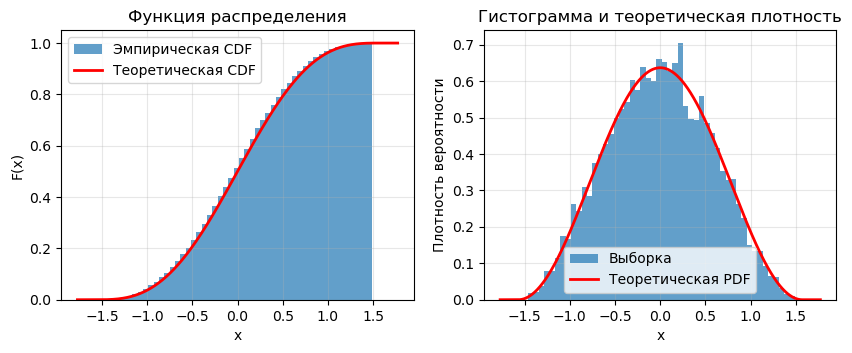

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class CustomDistribution(rv_continuous):
    def __init__(self, a, b):
        super().__init__(a=a, b=b, name='custom_dist')
    
    def _pdf(self, x):
        """Плотность распределения"""
        result = np.zeros_like(x)
        result[(x >= self.a) & (x <= self.b)] = (2/np.pi)*np.cos(x)**2
        return result
    
    def _cdf(self, x):
        "Функция распределения"
        result = np.zeros_like(x)
        result[x < self.a] = 0
        result[(x >= self.a) & (x <= self.b)] = (2*x+np.sin(2*x))/(2*np.pi)+1/2
        result[x > self.b] = 1
        return result
    
    # def _ppf(self, q):
    #     """Обратная функция распределения (квантильная функция)"""
    #     return (15 * q + 1) ** 0.25
    
a, b = -np.pi/2, np.pi/2
custom_dist = CustomDistribution(a, b) # создаем экземпляр распределения

# np.random.seed(42)
sample = custom_dist.rvs(size=10000) # генерация выборки

print(f"Размер выборки: {len(sample)}")
print(f"Первые 10 значений: {sample[:10]}")

x_test = np.linspace(a - 0.5, b + 0.5, 100)
pdf_values = custom_dist.pdf(x_test)
cdf_values = custom_dist.cdf(x_test)

print("Проверка нормировки плотности:")
integral, error = integrate.quad(custom_dist.pdf, a, b)
print(f"int f(x)dx на [{a}, {b}] = {integral:.6f} (ошибка: {error:.2e})")

print("\nПроверка в граничных точках:")
print(f"F({a}) = {custom_dist.cdf(a):.6f}")
print(f"F({b}) = {custom_dist.cdf(b):.6f}")

# --- p%-точка (квантиль) ---
p = 0.8  # например, 80%-квантиль
q_p = custom_dist.ppf(p)
print(f"{int(p*100)}%-точка (квантиль): {q_p:.4f}")

# --- проверка попадания НСВ в интервал [L, R] ---
L, R = -0.5, 0.5  # задай нужный диапазон

# Теоретическая вероятность попадания:
prob_theor = custom_dist.cdf(R) - custom_dist.cdf(L)
print(f"Теоретическая P({L} <= X <= {R}) = {prob_theor:.4f}")

# Эмпирическая оценка по выборке:
mask = (sample >= L) & (sample <= R)
prob_emp = np.mean(mask)
print(f"Эмпирическая P({L} <= X <= {R}) ≈ {prob_emp:.4f}")
print(f"Число точек в интервале: {mask.sum()} из {len(sample)}")

# Вычисление числовых характеристик
print("ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ".center(50, '*'))
print(f"Математическое ожидание: {custom_dist.mean():.4f}")
print(f"Медиана: {custom_dist.median():4f}")
print(f"Дисперсия: {custom_dist.var():.4f}")
print(f"Стандартное отклонение: {custom_dist.std():.4f}")
print("Статистики (среднее, дисперсия, асимметрия, эксцесс):",
      *custom_dist.stats(moments='mvsk'), sep='\n\t')

# Квантили
print(f"25%-квантиль: {custom_dist.ppf(0.80):.4f}")
print(f"75%-квантиль: {custom_dist.ppf(0.75):.4f}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))

# Сетка x для теоретических кривых
x_plot = np.linspace(a - 0.2, b + 0.2, 1000)

# 1. Функция распределения (CDF)
ax1.hist(
    sample,
    bins=50,
    density=True,
    cumulative=True,
    alpha=0.7,
    label='Эмпирическая CDF'
)
ax1.plot(
    x_plot,
    custom_dist.cdf(x_plot),
    'r-',
    linewidth=2,
    label='Теоретическая CDF'
)
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title('Функция распределения')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Гистограмма и теоретическая плотность (PDF)
ax2.hist(
    sample,
    bins=50,
    density=True,
    alpha=0.7,
    label='Выборка'
)
ax2.plot(
    x_plot,
    custom_dist.pdf(x_plot),
    'r-',
    linewidth=2,
    label='Теоретическая PDF'
)
ax2.set_xlabel('x')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title('Гистограмма и теоретическая плотность')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()